Codigo para preparar Training Dataset Para outliers detection y entrenamiento. 
El tratamiento incluye:
- Descartar logs que no necesitamos:
  - BS, CALI, DENC, ROP
- Convertir los valores -9999 to NAN
- Descartar Rows que no tienen datos de salida (SW, PHIF, VSH)
- Convertir los valores de resistividad (RMED y RDEP) to log10

Nota: En este paso no normalizamos, ya que es mas sencillo manejar outliers sin normalizar. Para el proceso de entrenamiento de la red y predicciones, los datos deben ser normalizados

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import missingno as msno
from scipy import interpolate
#from sklearn.preprocessing import StandardScaler

   WELLNUM       DEPTH     DTC     DTS      BS    CALI     DEN    DENC  \
0        0  335.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1        0  335.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2        0  336.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3        0  336.660105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4        0  337.160105 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

       GR     NEU     PEF    RDEP    RMED     ROP    PHIF      SW     VSH  
0  5.3274 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
1  5.8235 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
2  6.5228 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
3  7.2285 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
4  9.5020 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
   WELLNUM       DEPTH     DTC     DTS     DEN      GR     NEU     PEF  \
0        0  335.160105 -9

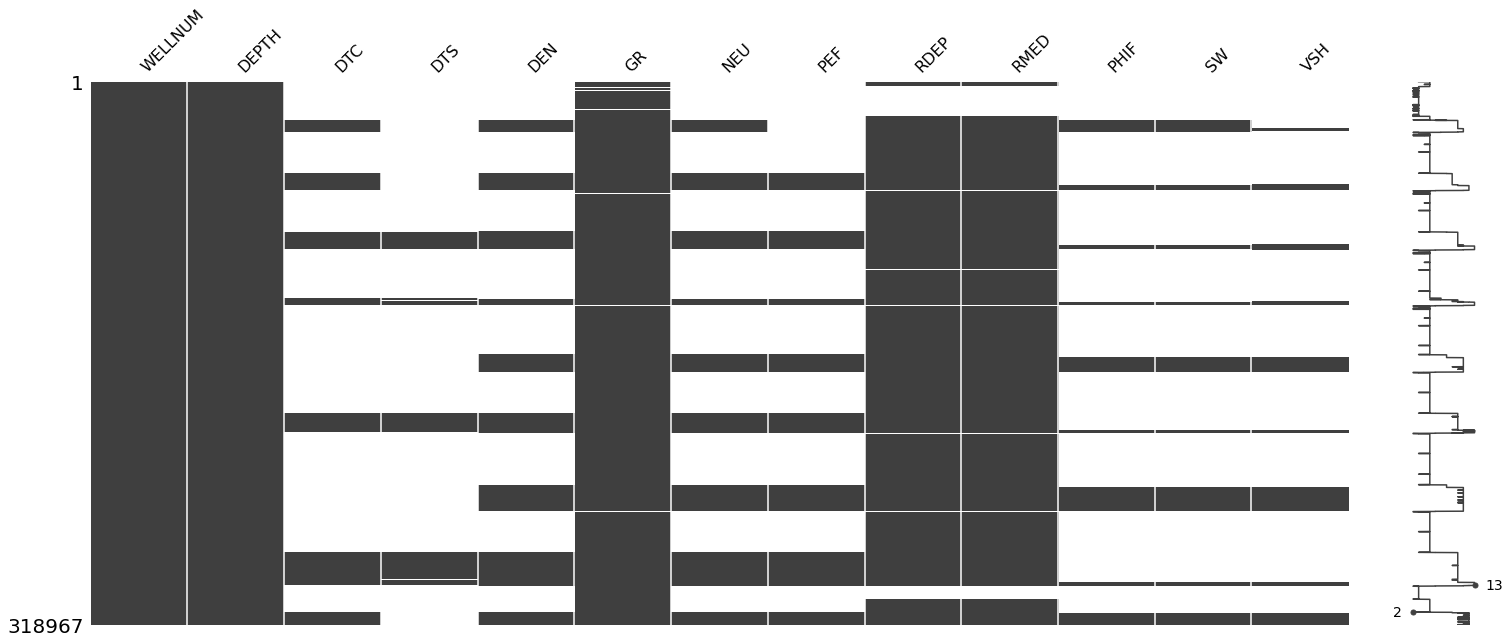

In [5]:
#Load dataset file
train_path = r"/Users/astromeria/Documents/SPWLA_competition/data/train.csv"
train_data = pd.read_csv(train_path)

logs_discarded = ["BS", "CALI", "DENC", "ROP"]
targets = ['PHIF', 'VSH', 'SW']
features = ["DEN","GR","NEU", "RDEP","RMED", "PEF", "DTC"]
print(train_data.head())
#drop irrelevant columns
train_data = train_data.drop(columns=logs_discarded)
print(train_data.head())

#convert -9999 values to NaN
train_data = train_data.mask(train_data == -9999.0, np.nan)
msno.matrix(train_data)
print(train_data.head())



#drop roww if nan in the target columns
print("shape before dropna on targets:", train_data.shape)
train_data = train_data.dropna(subset=targets)
print(train_data.head())
print("Shape after dropna on targets:", train_data.shape)



In [3]:


#Replace negative values of resistivity to zero
print(np.min(train_data.RDEP))
print(np.min(train_data.RMED))

#train_data.RDEP = np.where(train_data.RDEP < 0, 0, train_data.RDEP)
#train_data.RMED = np.where(train_data.RMED < 0, 0, train_data.RMED)

#print(np.min(train_data.RDEP))
#print(np.min(train_data.RMED))

#convert resistivity to log
train_data["RDEP"] = np.log10(train_data['RDEP'])
train_data["RMED"] = np.log10(train_data['RMED'])



#train_data.to_csv("train_dataset_clean.csv", index = False)




0.1295
0.1394
